In [2]:
import pandas as pd
import numpy as np
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
from sklearn.svm import SVC
#from sklearn.cluster import KMeans
#from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix

#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [3]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [4]:
A549_TGF_scRNAseq = pd.read_csv('A549_TGFB1.normalized.txt',sep='\t',index_col=0)
A549_EGF_scRNAseq = pd.read_csv('A549_EGF.normalized.txt',sep='\t',index_col=0)
A549_TNF_scRNAseq = pd.read_csv('A549_TNF.normalized.txt',sep='\t',index_col=0)

A549_TGF_scRNAseq

,AAACCCACACCAAAGG,AAACCCACAGAGATTA,AAAGGATAGTCCTGTA,AAAGGTAAGGCGACAT,AACACACTCTGCGTCT,AACAGGGCAACACGAG,AACCATGGTTATCTTC,AACCCAAAGGTAGACC,AACCCAATCCATCACC,AACCTGACAGACCTGC,...,TCAAGTGGTCAACATC,TCAGGTAAGGGATCAC,TCATGCCCACATGTTG,TCGCTTGGTGATAGAT,TGCAGTAGTGTACAGG,TGTACAGTCATGCCAA,TTGGGTAAGTTGCTCA,TTTGGAGCAACATACC,AATGCCAAGTGTGTTC,CCGGGTATCGTGGGTC
AL669831.5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
FAM41C,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL645608.3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL645608.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.767296
SAMD11,0.545078,0.0,0.0,0.891356,0.645806,1.154717,0.0,0.609833,0.59346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BX004987.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AC011043.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL592183.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL354822.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [5]:
A549_TGF_metadata = pd.read_csv('A549_TGFB1_metadata.txt',sep='\t',index_col=0)
A549_EGF_metadata = pd.read_csv('A549_EGF_metadata.txt',sep='\t',index_col=0)
A549_TNF_metadata = pd.read_csv('A549_TNF_metadata.txt',sep='\t',index_col=0)

A549_TGF_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,Barcode,Drug,Target,CellLine,Treatment,Doublet,Condition,DrugBroad,ConditionBroad,S.Score,G2M.Score,Phase,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.25
AAACCCACACCAAAGG,Plate1,13798,3657,0.115524,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.081115,0.198469,G2M,0,0,0
AAACCCACAGAGATTA,Plate1,9673,2946,0.117544,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.112881,-0.171010,G1,0,0,0
AAAGGATAGTCCTGTA,Plate1,7946,2476,0.187138,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.229076,-0.421427,G1,0,0,0
AAAGGTAAGGCGACAT,Plate1,6952,2048,0.199799,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.093443,-0.291145,G1,0,0,0
AACACACTCTGCGTCT,Plate1,11019,3203,0.149741,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.002370,-0.137601,G1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTACAGTCATGCCAA,Plate1,2298,1109,0.134465,Bar45,AG-370,PDGFR,A549,TGFB1,Singlet,TGFB1_AG-370,Inhibited,TGFB1_Inhibited,-0.086841,-0.261770,G1,4,2,2
TTGGGTAAGTTGCTCA,Plate1,4439,1652,0.097770,Bar30,Torin 1,mTOR,A549,TGFB1,Singlet,TGFB1_Torin 1,Inhibited,TGFB1_Inhibited,-0.019462,0.018343,G2M,4,1,1
TTTGGAGCAACATACC,Plate1,5537,1759,0.136175,Bar30,Torin 1,mTOR,A549,TGFB1,Singlet,TGFB1_Torin 1,Inhibited,TGFB1_Inhibited,-0.184050,-0.390063,G1,4,1,1
AATGCCAAGTGTGTTC,Plate1,1493,890,0.010047,Bar25,PKC 412,PKC,A549,TGFB1,Singlet,TGFB1_PKC 412,Inhibited,TGFB1_Inhibited,-0.201417,-0.322569,G1,5,0,0


In [6]:
A549_TGF_init_ctrls = A549_TGF_scRNAseq[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
A549_EGF_init_ctrls = A549_EGF_scRNAseq[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
A549_TNF_init_ctrls = A549_TNF_scRNAseq[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)


In [7]:
# normalizing the datasets
A549_TGF_scRNAseq_norm_ = A549_TGF_scRNAseq.subtract(A549_TGF_init_ctrls,axis=0)
A549_EGF_scRNAseq_norm_ = A549_EGF_scRNAseq.subtract(A549_EGF_init_ctrls,axis=0)
A549_TNF_scRNAseq_norm_ = A549_TNF_scRNAseq.subtract(A549_TNF_init_ctrls,axis=0)


In [8]:
# taking intersection of genes
genes_list_A549 = list(set(A549_TGF_scRNAseq_norm_.index) & set(A549_EGF_scRNAseq_norm_.index) & set(A549_TNF_scRNAseq_norm_.index))
print(len(genes_list_A549))
A549_TGF_scRNAseq_norm = A549_TGF_scRNAseq_norm_.loc[genes_list_A549].copy()
A549_EGF_scRNAseq_norm = A549_EGF_scRNAseq_norm_.loc[genes_list_A549].copy()
A549_TNF_scRNAseq_norm = A549_TNF_scRNAseq_norm_.loc[genes_list_A549].copy()


12926


In [9]:
# read drugs legend
dr_legend = pd.read_excel('drugs_legend.xlsx',index_col=0)
dr_legend

,Target
Drug,
PKC 412,PKC
Doramapimod,p38
Erlotinib,EGFR
NVP-BEZ235,PI3K
Phthalazinone Pyrazole,Aurora-A
Torin 1,mTOR
BIBF 1120,VGFR/PDGFR/FGFR
CAY10657,IKK2
Ruxolitinib,JAK


In [10]:
# calculating STV
trainset_epi = A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes = A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset = pd.concat([trainset_epi,trainset_mes],axis=1)

cls = list(np.full(len(trainset_epi.columns),0)) + list(np.full(len(trainset_mes.columns),1))

svc = SVC(kernel='linear')
svc.fit(gene_trainset.transpose(),cls)
b_coeff = -svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = svc.coef_[0]/linalg.norm(svc.coef_[0])

epi_cnt = trainset_epi.mean(axis=1)
mes_cnt = trainset_mes.mean(axis=1)
s_vec = (mes_cnt - epi_cnt)/linalg.norm(mes_cnt - epi_cnt)

norm_vec_df = pd.DataFrame(s_vec,index=gene_trainset.index,columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
#norm_vec_df.to_csv('Phospho_MS_STV.csv')
#norm_vec_df.sort_values(by='norm_vec')

angle = (np.arccos(np.dot(norm_vec,s_vec))/np.pi)*180
angle

42.021110697626135

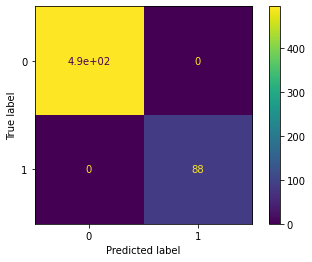

In [11]:
plot_confusion_matrix(svc,gene_trainset.transpose(),cls)
# clear separation

In [12]:
norm_vec_df.to_csv('EMT_STV_scRNAseq_A549.csv')
norm_vec_df.sort_values(by='norm_vec')

,norm_vec,s_vec
CAV1,-0.117024,-0.059064
S100A4,-0.084485,-0.080310
ASPH,-0.070249,-0.070472
AREG,-0.064849,-0.063514
MYOF,-0.062377,-0.060868
...,...,...
PMEPA1,0.078990,0.141725
FOXP1,0.089805,0.087234
NPTX1,0.098070,0.115834
CCDC80,0.098656,0.120192


In [13]:
norm_vec_df.loc['EPCAM']

norm_vec    0.005042
s_vec      -0.000726
Name: EPCAM, dtype: float64

In [14]:
# run PCA and plot separation

pca = PCA(n_components=3)
Spca = pca.fit_transform(gene_trainset.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_sc = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=gene_trainset.columns)
PCA_sc

Explained variances by components:  [0.01833486 0.01658174 0.01090042] total variance explained:  0.04581702222560287


,PC1,PC2,PC3
AAACGAATCCTTATAC,-3.869769,7.097998,0.260488
AAAGGATAGACTGGGT,2.147037,-5.108427,1.661045
AAAGGATAGGATACAT,-5.765573,-1.291199,5.126798
AAAGGATTCTGCAGCG,1.961248,-0.620304,-1.292632
AAAGGGCAGAGGCTGT,-2.751332,1.317173,2.731357
...,...,...,...
TTTCAGTTCAACCTCC,6.101787,11.228320,1.491129
GACTATGCAGCCGTTG,23.673187,-3.233355,20.952827
GCGGATCTCTGGGCAC,18.986098,-1.821174,23.322520
GTATTTCAGGTGCTTT,24.820123,-0.387563,25.528808


In [15]:
trainset_epi_PCA = PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes_PCA = PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset_PCA = pd.concat([trainset_epi_PCA,trainset_mes_PCA],axis=0)

cls_PCA = list(np.full(len(trainset_epi_PCA.index),0)) + list(np.full(len(trainset_mes_PCA.index),1))

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(gene_trainset_PCA,cls_PCA)

print(svc_PCA.intercept_)


[-2.61020015]


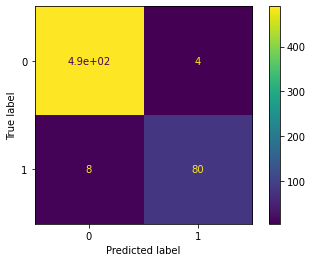

In [16]:
plot_confusion_matrix(svc_PCA,gene_trainset_PCA,cls_PCA)
# PCA introduces distortion to the data

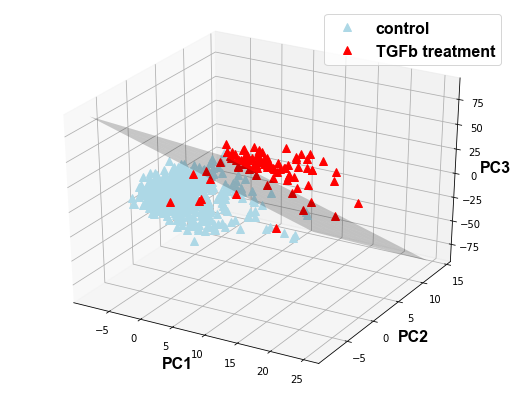

In [17]:
# 3D visualization with plane


fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

z2 = lambda x,y: (-svc_PCA.intercept_-svc_PCA.coef_[0][0]*x-svc_PCA.coef_[0][1]*y) / svc_PCA.coef_[0][2]
tmpx = np.linspace(min(gene_trainset_PCA.iloc[:,0]),max(gene_trainset_PCA.iloc[:,0]),10)
tmpy = np.linspace(min(gene_trainset_PCA.iloc[:,1]),max(gene_trainset_PCA.iloc[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)
zs = z2(xs,ys)

ax.plot_surface(xs, ys, zs,color='black',linewidth=0,alpha=0.2)


ax.plot3D(PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,0],PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,1],PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,2],'^',color='lightblue',label='control',ms=8) 

ax.plot3D(PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,0],PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,1],PCA_sc.loc[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,2],'^',color='red',label='TGFb treatment',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()



In [18]:
# entring parameters for plots
drug_plot='Necrostatin-5'
gene_name='VIM'

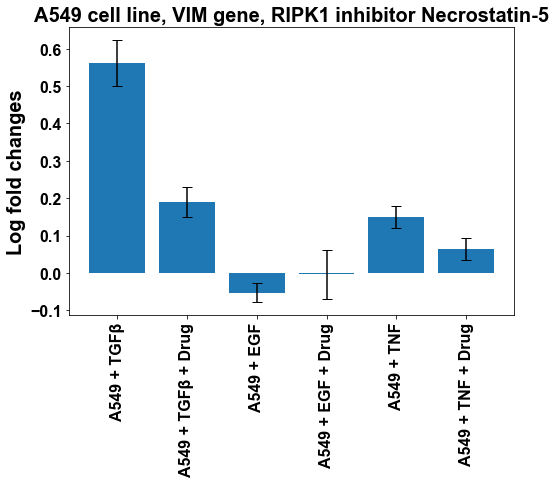

In [19]:
# make bar plot for all cells
names = ['A549 + TGFβ','A549 + TGFβ + Drug','A549 + EGF','A549 + EGF + Drug','A549 + TNF','A549 + TNF + Drug']

if drug_plot in list(set(A549_TGF_metadata['Drug'])):
    A549_TGF_gene_ctrl = statistics.mean(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_ctrl_err = stats.sem(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_drug = statistics.mean(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    A549_TGF_gene_drug_err = stats.sem(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_TGF_gene_ctrl = statistics.mean(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_ctrl_err = stats.sem(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_drug = 0
    A549_TGF_gene_drug_err = 0

if drug_plot in list(set(A549_EGF_metadata['Drug'])):
    A549_EGF_gene_ctrl = statistics.mean(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_ctrl_err = stats.sem(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_drug = statistics.mean(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    A549_EGF_gene_drug_err = stats.sem(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_EGF_gene_ctrl = statistics.mean(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_ctrl_err = stats.sem(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_drug = 0
    A549_EGF_gene_drug_err = 0

if drug_plot in list(set(A549_TNF_metadata['Drug'])):
    A549_TNF_gene_ctrl = statistics.mean(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_ctrl_err = stats.sem(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_drug = statistics.mean(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    A549_TNF_gene_drug_err = stats.sem(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_TNF_gene_ctrl = statistics.mean(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_ctrl_err = stats.sem(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_drug = 0
    A549_TNF_gene_drug_err = 0

values = [A549_TGF_gene_ctrl,A549_TGF_gene_drug,A549_EGF_gene_ctrl,A549_EGF_gene_drug,A549_TNF_gene_ctrl,A549_TNF_gene_drug]
errs = [A549_TGF_gene_ctrl_err,A549_TGF_gene_drug_err,A549_EGF_gene_ctrl_err,A549_EGF_gene_drug_err,A549_TNF_gene_ctrl_err,A549_TNF_gene_drug_err]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('A549 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values,yerr=errs,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

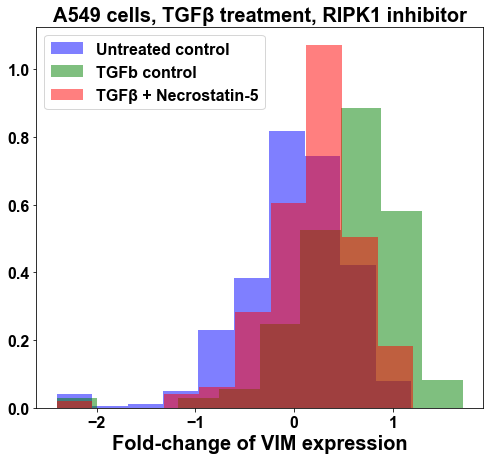

In [20]:
# plot distribution for specific gene

A549_TGF_gene_notr = list(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
A549_TGF_gene_ctrl = list(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
if drug_plot in list(set(A549_TGF_metadata['Drug'])):
    A549_TGF_gene_drug = list(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_TGF_gene_drug = []

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.hist(A549_TGF_gene_notr, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(A549_TGF_gene_ctrl, bins=10,density=True,color='green',label='TGFb control',alpha=0.5)
plt.hist(A549_TGF_gene_drug, bins=10,density=True,color='red',label='TGFβ + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, TGFβ treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('Fold-change of ' + gene_name + ' expression',**fontLabel)

plt.show()

In [21]:
# plotting DPD distribution
drug_plot='Necrostatin-5'
#drug_plot='CHIR99021'

DPD for epithelial state = -5.7934725632574215 ± 0.02830529189302452
DPD for TGFb control = 5.343098471561534 ± 0.03031471833174679
DPD for RIPK1 inhibitor = -1.9857943952370873 ± 0.15995902635420026


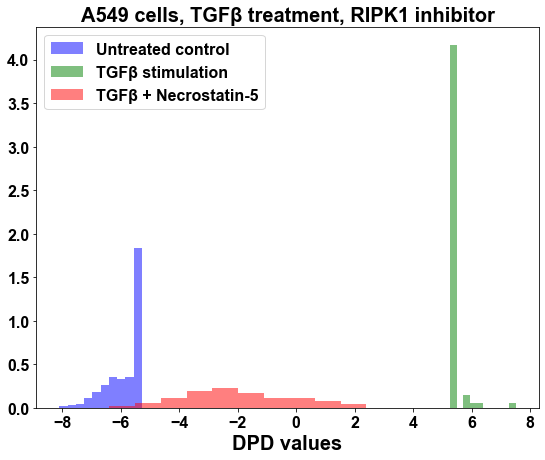

In [22]:
DPDs_epi = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TGFβ + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, TGFβ treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -5.7934725632574215 ± 0.02830529189302452
DPD for TGFb control = 5.343098471561534 ± 0.03031471833174679


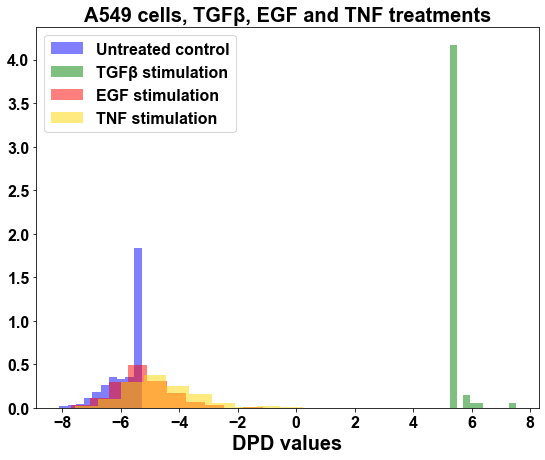

In [23]:
DPDs_epi = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_EGF = []
for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_EGF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_TNF = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_TNF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
#print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_EGF, bins=10,density=True,color='red',label='EGF stimulation',alpha=0.5) 
plt.hist(DPDs_TNF, bins=10,density=True,color='gold',label='TNF stimulation',alpha=0.5) 

plt.title('A549 cells, TGFβ, EGF and TNF treatments',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

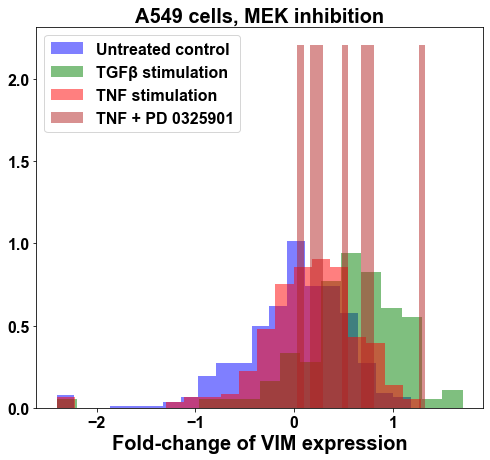

In [24]:
# plot distribution for specific gene
gene_name='VIM'
drug_plot='PD 0325901'

A549_TGF_gene_notr = list(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
A549_TGF_gene_ctrl = list(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
if drug_plot in list(set(A549_TGF_metadata['Drug'])):
    A549_TGF_gene_drug = list(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_TGF_gene_drug = []

A549_EGF_gene_notr = list(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
A549_EGF_gene_ctrl = list(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
if drug_plot in list(set(A549_EGF_metadata['Drug'])):
    A549_EGF_gene_drug = list(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_EGF_gene_drug = []

A549_TNF_gene_notr = list(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
A549_TNF_gene_ctrl = list(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
if drug_plot in list(set(A549_TNF_metadata['Drug'])):
    A549_TNF_gene_drug = list(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_TNF_gene_drug = []

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.hist(A549_TGF_gene_notr, bins=20,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(A549_TGF_gene_ctrl, bins=20,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(A549_TNF_gene_ctrl, bins=20,density=True,color='red',label='TNF stimulation',alpha=0.5)
plt.hist(A549_TNF_gene_drug, bins=20,density=True,color='firebrick',label='TNF + ' + drug_plot,alpha=0.5)

plt.title('A549 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('Fold-change of ' + gene_name + ' expression',**fontLabel)

plt.show()

DPD for epithelial state = -5.7934725632574215 ± 0.02830529189302452
DPD for TGFb control = 5.343098471561534 ± 0.03031471833174679
DPD for MEK inhibitor = -1.095554797508577 ± 0.6177345509686244


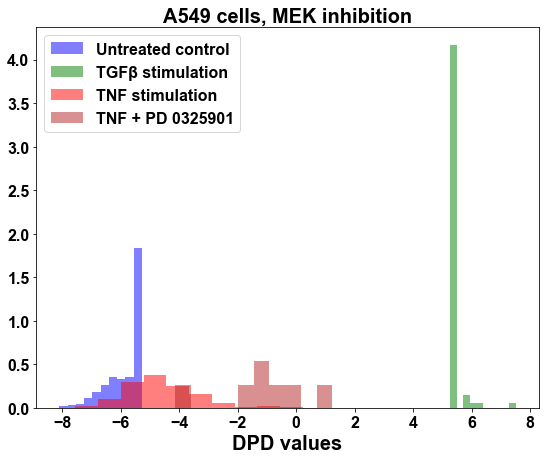

In [25]:
DPDs_epi = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_TNF = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_TNF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_TNF, bins=10,density=True,color='red',label='TNF stimulation',alpha=0.5) 
plt.hist(DPDs_drg, bins=10,density=True,color='firebrick',label='TNF + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -5.7934725632574215 ± 0.028305292154574776
DPD for EGF control = -5.248123385468534 ± 0.05129193256545552
DPD for MEK inhibitor = -2.7972308739104212 ± 0.40615482630190236


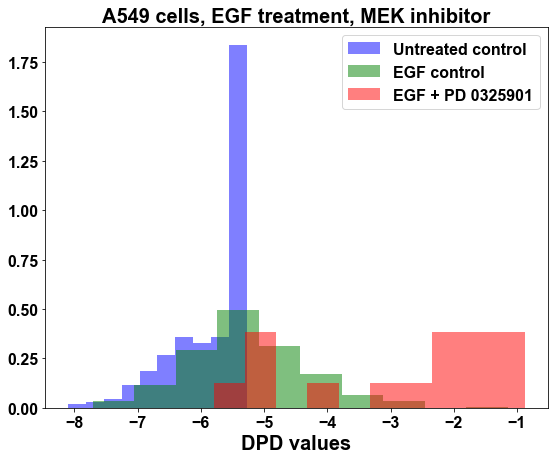

In [26]:
DPDs_epi = []
for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for EGF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='EGF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='EGF + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, EGF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -5.7934725632574215 ± 0.028305291947393004
DPD for TNF control = -4.590512715247333 ± 0.06715478713563339
DPD for MEK inhibitor = -1.095554797508577 ± 0.6177345509686244


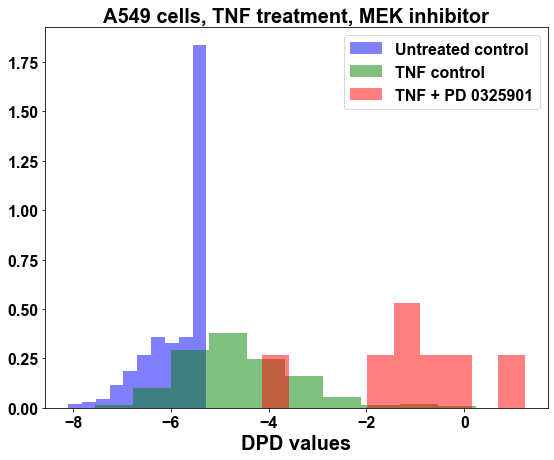

In [27]:
DPDs_epi = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TNF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TNF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TNF + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, TNF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [28]:
# now we need to calculate DPDs
dr_legend['DPD_A549_TGFB']=np.nan
dr_legend['DPD_A549_EGF']=np.nan
dr_legend['DPD_A549_TNF']=np.nan

for drug in list(set(A549_TGF_metadata['Drug'])):
    #print("Processing data for A549 cells, TGFB, " + drug)
    DPDs_drg = []
    for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_A549_TGFB'] = statistics.mean(DPDs_drg)

for drug in list(set(A549_EGF_metadata['Drug'])):
    #print("Processing data for A549 cells, EGF, " + drug)
    DPDs_drg = []
    for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_A549_EGF'] = statistics.mean(DPDs_drg)

for drug in list(set(A549_TNF_metadata['Drug'])):
    #print("Processing data for A549 cells, TNF, " + drug)
    DPDs_drg = []
    for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_A549_TNF'] = statistics.mean(DPDs_drg)

dr_legend.to_csv('A549_EMT_scDPD_vals.csv')
dr_legend

,Target,DPD_A549_TGFB,DPD_A549_EGF,DPD_A549_TNF
Drug,,,,
PKC 412,PKC,-0.010334,-3.599893,NaN
Doramapimod,p38,3.123074,-5.072059,-3.997641
Erlotinib,EGFR,3.731145,-5.224335,NaN
NVP-BEZ235,PI3K,NaN,-0.807113,NaN
Phthalazinone Pyrazole,Aurora-A,0.312009,-5.303747,NaN
Torin 1,mTOR,2.682735,-0.806931,NaN
BIBF 1120,VGFR/PDGFR/FGFR,-2.860262,-5.468359,NaN
CAY10657,IKK2,-0.614033,-4.312563,NaN
Ruxolitinib,JAK,2.463182,-5.317310,-4.819693


In [29]:
KEA_df = pd.read_excel('kinase_screen_signatures.xlsx',index_col=0)
KEA_df

,Target,transcr_targets
Drug,,
LY364947,TGFBR1,"CDH1,TGFB1I1,PPP1CA,WWP2,EGR1,STAT1,OTUB1,SP1,..."
Erlotinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
Gefitinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
BIBF 1120,VGFR/PDGFR/FGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
PD 0325901,MEK/ERK,"NFIC,JAK1,GSK3B,STUB1,JUND,TUBB,TGFB1I1,NFATC1..."
NVP-BEZ235,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
Torin 1,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
PKC 412,PKC,"ELF3,HNRNPD,AURKA,PA2G4,RB1,GADD45A,KDM1A,FBXW..."
Doramapimod,p38,"SVIL,AURKA,STAG1,GSK3B,YY1,USP37,JUND,FOXM1,TU..."


In [30]:
# preparing modules and perturbation lists
perturbations = list(KEA_df.index)
modules = []
for pert in perturbations:
    if len(modules) > 0:
        if KEA_df.loc[pert,'Target'] != modules[-1]:
            modules.append(KEA_df.loc[pert,'Target'])
    else: 
        modules.append(KEA_df.loc[pert,'Target'])
modules.append('DPD')
print("Our modules are: " + ", ".join(modules) + ". " + str(len(modules)) + " in total.")
print('\n')
print("Applied perturbations are: " + ", ".join(perturbations) + ". " + str(len(perturbations)) + " in total.")


Our modules are: TGFBR1, EGFR, VGFR/PDGFR/FGFR, MEK/ERK, PI3K/mTOR, PKC, p38, JNK, Aurora-A, RIPK1, IKK2, JAK, GSK3B, DPD. 14 in total.


Applied perturbations are: LY364947, Erlotinib, Gefitinib, BIBF 1120, PD 0325901, NVP-BEZ235, Torin 1, PKC 412, Doramapimod, SP 600125, Phthalazinone Pyrazole, Necrostatin-5, CAY10657, Ruxolitinib, CHIR99021. 15 in total.


In [31]:
# filling R matrices for A549 cells
R_A549_TGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_A549_EGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_A549_TNF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)


# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_A549_TGFB']
    x1 = dr_legend.loc[pert,'DPD_A549_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_A549_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_A549_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_A549_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_A549_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_A549_EGF']
        x1 = dr_legend.loc[pert,'DPD_A549_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_A549_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_A549_TNF']
    x1 = dr_legend.loc[pert,'DPD_A549_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_A549_TNF.at['DPD',pert] = R_global

R_A549_EGF.drop('Gefitinib', axis=1, inplace=True)
R_A549_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)

R_A549_TGF.to_csv('R_A549_TGFb_DPD.csv')
R_A549_EGF.to_csv('R_A549_EGF_DPD.csv')
R_A549_TNF.to_csv('R_A549_TNF_DPD.csv')
R_A549_TGF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-1.99027,-0.301689,-0.511828,-1.535319,-1.507645,NaN,-0.497907,-1.001934,-0.415494,-0.415681,-0.941605,-1.371656,-1.114921,-0.538998,-0.938998


In [32]:
R_A549_EGF

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.034645,-0.094132,-0.040274,0.467004,0.846209,0.846244,0.314061,0.033548,0.054662,-0.010488,-0.039052,0.178266,-0.013011,0.106621


In [33]:
R_A549_TNF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.211813,NaN,0.199741,NaN,0.761344,NaN,NaN,NaN,0.129151,0.025514,NaN,-0.227355,NaN,-0.047551,-0.027192
